In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
bndR = cv2.imread('imgpack/LandSat_C/Landsat_C_04-11_R.png', cv2.IMREAD_GRAYSCALE)
bndG = cv2.imread('imgpack/LandSat_C/Landsat_C_03-11_G.png', cv2.IMREAD_GRAYSCALE)
bndB = cv2.imread('imgpack/LandSat_C/Landsat_C_02-11_B.png', cv2.IMREAD_GRAYSCALE)
bndNIR =cv2.imread('imgpack/LandSat_C/Landsat_C_05-11_NIR.png', cv2.IMREAD_GRAYSCALE)

In [9]:
def falso (bnd1,bnd2,bnd3):
    img= cv2.merge((bnd1,bnd2,bnd3))
    return img

In [4]:
img_f=falso(bndNIR,bndG,bndB)

In [14]:
img = falso(bndR,bndG,bndB)

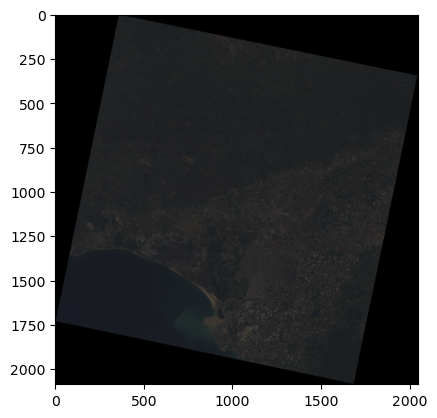

In [15]:
plt.imshow(img)

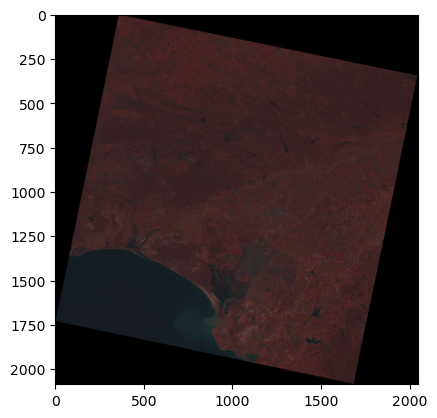

In [16]:
plt.imshow(img_f)

In [17]:
def Histograma(img):
    " Para crear una lista ordenada con los valores"
    l=[0 for x in range(256)]
    for m in img:
        l2=m.tolist()
        for x in range(256):
            l[x]=l[x]+l2.count(x)
    return l

In [18]:
def Cmin (histograma,porcentaje):
    numpixel=sum(histograma)
    cmin=0
    cont=0
    ret = numpixel * (porcentaje)
    for i in range(len(histograma)):
        if cont>ret:
            res=i
            break
        else:
            cont=cont+histograma[i]
    return res
    

In [19]:
def Cmax (histograma,porcentaje):
    numpixel=sum(histograma)
    cmin=0
    cont=0
    ret = numpixel * (1-porcentaje)
    for i in range(len(histograma)):
        if cont>ret:
            res=i
            break
        else:
            cont=cont+histograma[i]
    return res

In [20]:
def expan (img, cmin, cmax):
    resimg = img.copy()
    ndmax=255
    ndmin=0
    for i in range(resimg.shape[0]):
        for j in range(resimg.shape[1]):
            if resimg[i][j] <= cmin:
                resimg[i][j]=0
            elif resimg[i][j]>=cmax:
                resimg[i][j]=255
            else:
                resimg[i][j]=ndmin+(((resimg[i][j]-cmin)*(ndmax-ndmin))/(cmax-cmin))
    return resimg

In [21]:
def corte(img,porc):
    his = Histograma(img)
    cmin = Cmin(his,porc)
    cmax = Cmax(his,porc)
    resimg=expan(img,cmin,cmax)
    return resimg

In [42]:
corte_bndR =corte(bndR,0.01)
corte_bndG =corte(bndG,0.01)
corte_bndB =corte(bndB,0.01)
corte_bndNIR =corte(bndNIR,0.01)

In [57]:
img_f=falso(corte_bndNIR,corte_bndG,corte_bndR)

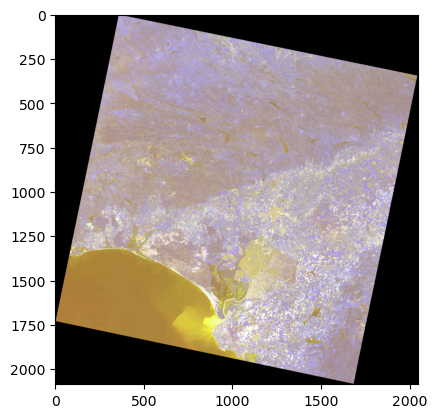

In [58]:
plt.imshow(corte_imgfal)

In [55]:
img_ver=falso(corte_bndR,corte_bndG,corte_bndB)

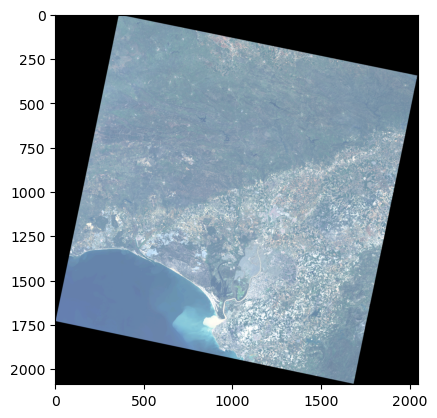

In [56]:
plt.imshow(img_ver)